In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dropout,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
cancer_data = datasets.load_breast_cancer()

In [ ]:
print(cancer_data.DESCR)

In [11]:
# converting data into DataFrame
x = pd.DataFrame(data= cancer_data.data, columns= cancer_data.feature_names)

In [12]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y = cancer_data.target

In [ ]:
y
# 0 for malignant tumor
# 1 for benign tumor

In [17]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
x.shape,y.shape

((569, 30), (569,))

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=101,stratify =y)

In [47]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [48]:
type(x_test)

pandas.core.frame.DataFrame

In [49]:
# First scaling our data using StandardScaler
# It also convert to pandas data type Dataframe into
# numpy array
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [50]:
x_test

array([[-0.68057073, -0.47463842, -0.70704348, ..., -0.92765949,
        -0.17060393, -0.13715036],
       [ 0.45669583, -0.32830485,  0.46701923, ...,  0.98967729,
         1.460805  ,  1.17820806],
       [-0.417685  , -0.37940546, -0.47007669, ..., -1.19004456,
        -1.15943422, -1.30586221],
       ...,
       [ 0.92531824,  1.45324835,  0.91858181, ..., -0.08002331,
        -2.06451993, -0.86369212],
       [ 1.60253476,  1.35104712,  1.57728319, ...,  0.87232617,
         0.67650475,  0.05466113],
       [ 0.08522685,  0.50091874,  0.07966968, ...,  0.10954388,
         0.21752001, -0.84807956]])

In [51]:
type(x_test)

numpy.ndarray

In [52]:
# Since Neural Network takes only 3 dimensional data 
# thus reshaping our data from 2 dimensional to three dimensional

x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

Building Model

In [67]:
epochs = 100

In [72]:
model = Sequential()

model.add(Conv1D(filters = 32,kernel_size = 2,activation='relu',input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters = 64,kernel_size = 2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_10 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1792)             

In [74]:
model.compile(optimizer=Adam(lr=0.0005),loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
history = model.fit(x_train,y_train,epochs = epochs, validation_data = (x_test,y_test),verbose =1)

Epoch 1/100
15/15 [==============================] - 0s 17ms/step - loss: 0.5693 - accuracy: 0.7802 - val_loss: 0.4480 - val_accuracy: 0.9123
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1766 - accuracy: 0.9319 - val_loss: 0.3526 - val_accuracy: 0.8684
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1094 - accuracy: 0.9604 - val_loss: 0.3294 - val_accuracy: 0.8421
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1222 - accuracy: 0.9604 - val_loss: 0.3263 - val_accuracy: 0.8333
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0915 - accuracy: 0.9626 - val_loss: 0.3237 - val_accuracy: 0.8246
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1198 - accuracy: 0.9604 - val_loss: 0.3404 - val_accuracy: 0.8246
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1067 - accuracy: 0.9538 - val_loss: 0.3533 - val_accuracy: 0.8158
Epoch 8/100


In [76]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

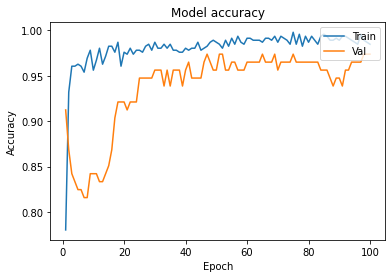

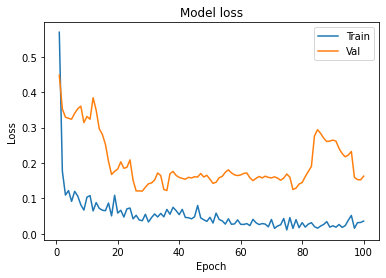

In [79]:
plot_learningCurve(history,epochs)

Tesing if is it possible to increase  **validation accuracy** from **97** to...

In [111]:
epochs = 49

model = Sequential()

model.add(Conv1D(filters = 32,kernel_size = 2,activation='relu',input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(filters = 64,kernel_size = 2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(1,activation='sigmoid'))


In [112]:
model.compile(optimizer=Adam(lr=0.0005),loss='binary_crossentropy',metrics=['accuracy'])

In [113]:
history = model.fit(x_train,y_train,epochs = epochs, validation_data = (x_test,y_test),verbose =1)

Epoch 1/49
15/15 [==============================] - 0s 19ms/step - loss: 0.6200 - accuracy: 0.7231 - val_loss: 0.4812 - val_accuracy: 0.9211
Epoch 2/49
15/15 [==============================] - 0s 8ms/step - loss: 0.3547 - accuracy: 0.8593 - val_loss: 0.4278 - val_accuracy: 0.9474
Epoch 3/49
15/15 [==============================] - 0s 8ms/step - loss: 0.2031 - accuracy: 0.9165 - val_loss: 0.4035 - val_accuracy: 0.9298
Epoch 4/49
15/15 [==============================] - 0s 8ms/step - loss: 0.1263 - accuracy: 0.9560 - val_loss: 0.3789 - val_accuracy: 0.9211
Epoch 5/49
15/15 [==============================] - 0s 8ms/step - loss: 0.1359 - accuracy: 0.9516 - val_loss: 0.3538 - val_accuracy: 0.9035
Epoch 6/49
15/15 [==============================] - 0s 9ms/step - loss: 0.1774 - accuracy: 0.9407 - val_loss: 0.3317 - val_accuracy: 0.9035
Epoch 7/49
15/15 [==============================] - 0s 8ms/step - loss: 0.1641 - accuracy: 0.9385 - val_loss: 0.3068 - val_accuracy: 0.9123
Epoch 8/49
15/15 [=

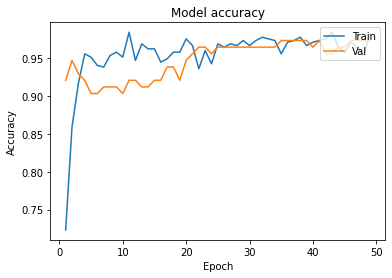

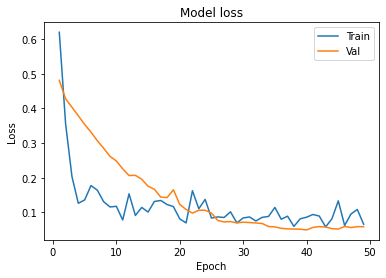

In [114]:
plot_learningCurve(history,epochs)